In [1]:
from warnings import filterwarnings
filterwarnings("ignore")
import os
os.chdir("E:/Data Science/DataSet/Loan")
import pandas as pd
A = pd.read_csv("training_set.csv")

In [2]:
A.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
A.isna().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Missing Data treatment

In [4]:
for i in A.columns:
    if(A[i].dtype=="object"):
        x = A[i].mode()[0]
        A[i] = A[i].fillna(x)
    else:
        x = A[i].mean()
        A[i] = A[i].fillna(x)

In [5]:
A.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Define X and Y

In [6]:
Y = A[["Loan_Status"]]
X = A.drop(labels=["Loan_Status","Loan_ID"],axis=1)

# EDA
1. Ycat,Xcon --> ANOVA
2. Ycat,Xcat --> chisquare

# Divide data in continuous and categorical

In [7]:
cat = []
con = []

for i in X.columns:
    if(X[i].dtype =="object"):
        cat.append(i)
    else:
        con.append(i)

In [8]:
A[cat]

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,Male,No,0,Graduate,No,Urban
1,Male,Yes,1,Graduate,No,Rural
2,Male,Yes,0,Graduate,Yes,Urban
3,Male,Yes,0,Not Graduate,No,Urban
4,Male,No,0,Graduate,No,Urban
...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural
610,Male,Yes,3+,Graduate,No,Rural
611,Male,Yes,1,Graduate,No,Urban
612,Male,Yes,2,Graduate,No,Urban


In [9]:
A[con]

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.00000,0.0,146.412162,360.0,1.0
1,5405.54085,1508.0,128.000000,360.0,1.0
2,3000.00000,0.0,66.000000,360.0,1.0
3,2583.00000,2358.0,120.000000,360.0,1.0
4,6000.00000,0.0,141.000000,360.0,1.0
...,...,...,...,...,...
609,2900.00000,0.0,71.000000,360.0,1.0
610,4106.00000,0.0,40.000000,180.0,1.0
611,8072.00000,240.0,253.000000,360.0,1.0
612,7583.00000,0.0,187.000000,360.0,1.0


# ANOVA (Ycat and Xcon)

In [10]:
def Anova(df,cat,con):
    from statsmodels.formula.api import ols
    from statsmodels.stats.anova import anova_lm
    ols = ols(f"{str(con)} ~ {str(cat)}",df).fit()
    anova_results = anova_lm(ols)
    return round(anova_results["PR(>F)"][0],3)
    

In [11]:
for i in con:
    print(f"-------Loan_Status and {i}-----------")
    print(Anova(A,"Loan_Status",i))

-------Loan_Status and ApplicantIncome-----------
0.903
-------Loan_Status and CoapplicantIncome-----------
0.142
-------Loan_Status and LoanAmount-----------
0.368
-------Loan_Status and Loan_Amount_Term-----------
0.604
-------Loan_Status and Credit_History-----------
0.0


# Chisquare (Ycat,Xcat ) 

In [12]:
val = pd.crosstab(A["Gender"],A["Loan_Status"])

In [13]:
from scipy.stats import chi2_contingency
a,b,c,d = chi2_contingency(val)

In [14]:
a

0.11087854691241235

In [15]:
b

0.7391461310869638

In [16]:
c

1

In [17]:
d

array([[ 35.0228013,  76.9771987],
       [156.9771987, 345.0228013]])

In [18]:
def chisqure(df,cat1,cat2):
    val = pd.crosstab(df[cat1],df[cat2])
    from scipy.stats import chi2_contingency
    a,b,c,d = chi2_contingency(val)
    return(b)

In [19]:
for i in cat:
    print(f"---------Chisqure of Loan_Status and {i} ------------")
    print(chisqure(A,i,"Loan_Status"))

---------Chisqure of Loan_Status and Gender ------------
0.7391461310869638
---------Chisqure of Loan_Status and Married ------------
0.029608580862582116
---------Chisqure of Loan_Status and Dependents ------------
0.3688663081366005
---------Chisqure of Loan_Status and Education ------------
0.04309962129357355
---------Chisqure of Loan_Status and Self_Employed ------------
1.0
---------Chisqure of Loan_Status and Property_Area ------------
0.0021360187811644937


# Standardization

In [20]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X[con])
X1 = pd.DataFrame(ss.fit_transform(X[con]),columns=con)

# Before Outliers Remove

In [21]:
import matplotlib.pyplot as plt
import seaborn as sb

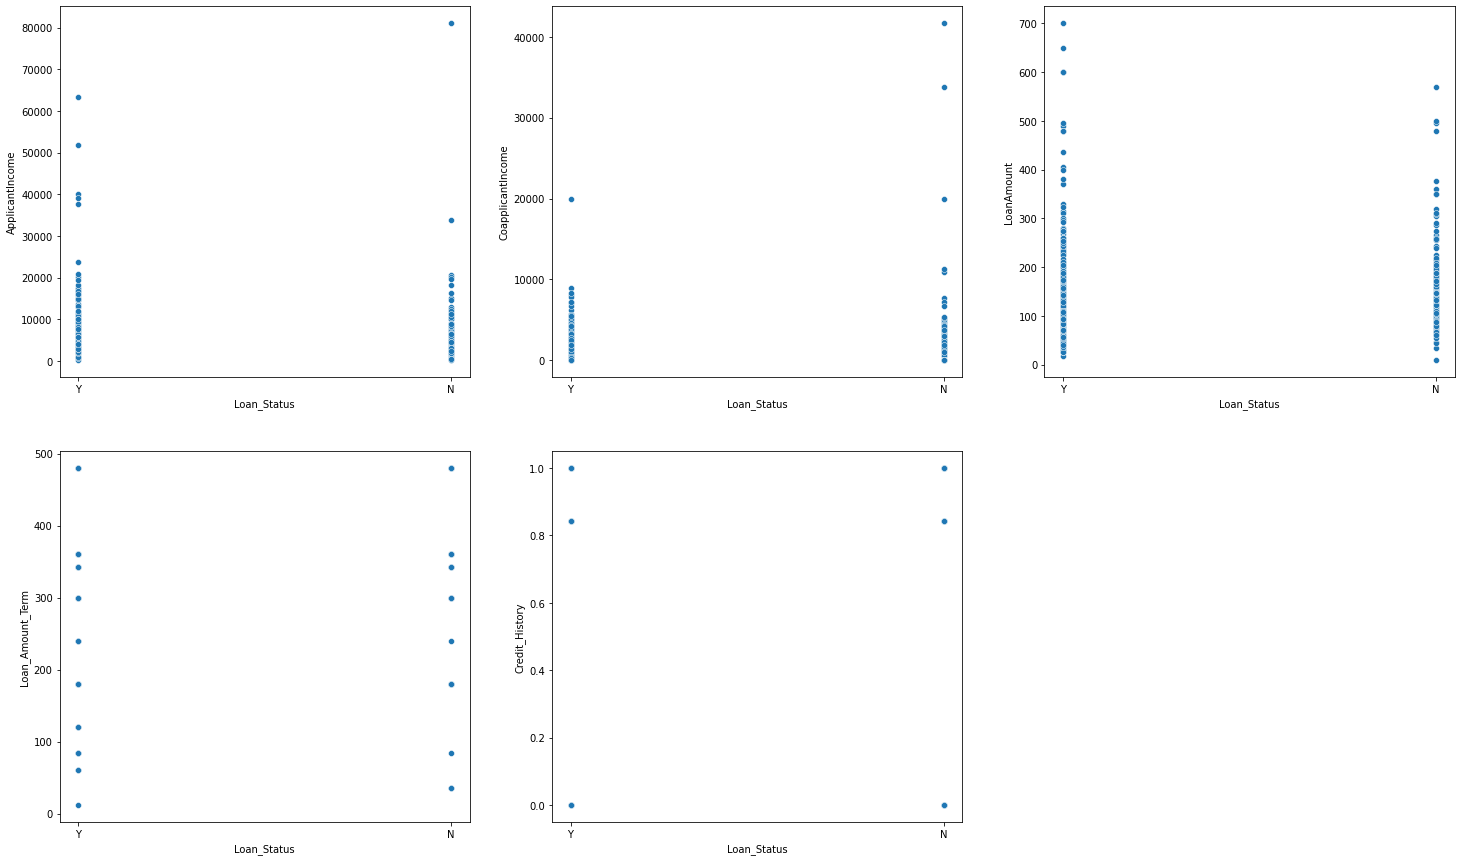

In [22]:
plt.figure(figsize=(25,15))
x = 1
for i in con:
    plt.subplot(2,3,x)
    sb.scatterplot(A["Loan_Status"],A[i])
    x = x+1

# Outliers

In [23]:
def Outlier(df):
    con = []
    for i in df.columns:
        if(df[i].dtype !="object"):
            con.append(i)
    outliers = []
    for i in con:
        outliers.extend(list(df[df[i]>3].index))
        outliers.extend(list(df[df[i]<-3].index))
    return outliers

In [24]:
outliers = Outlier(X1)

In [25]:
X = X.drop(index=outliers,axis=0)
Y = Y.drop(index=outliers,axis=0)

In [26]:
X.index = range(0,X.shape[0])
Y.index = range(0,Y.shape[0])

In [27]:
con_outlier = []

for i in X.columns:
    if(X[i].dtype !="object"):
        con_outlier.append(i)

# After removing outliers

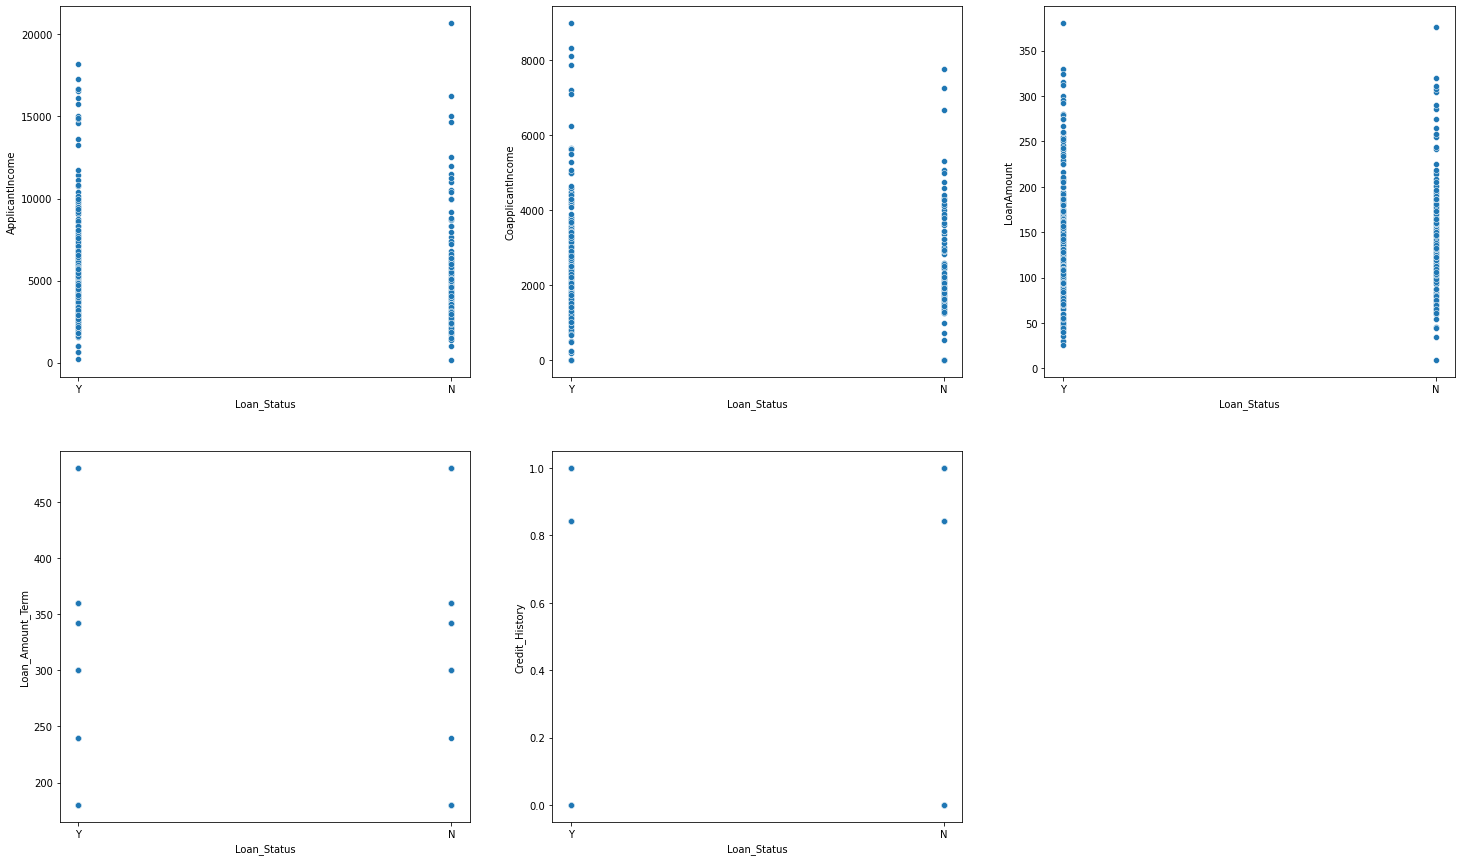

In [28]:
plt.figure(figsize=(25,15))
x = 1
for i in con_outlier:
    plt.subplot(2,3,x)
    sb.scatterplot(Y["Loan_Status"],X[i])
    x = x+1

# Preprocessing of data

In [29]:
def PreProcessing(df):
    cat = []
    con = []
    for i in X.columns:
        if(X[i].dtype =="object"):
            cat.append(i)
        else:
            con.append(i)
    from sklearn.preprocessing import StandardScaler
    ss = StandardScaler()
    X1 = pd.DataFrame(ss.fit_transform(df[con]),columns=con)
    X2 = pd.get_dummies(df[cat])
    Xnew = X1.join(X2)
    return Xnew


In [30]:
Xnew = PreProcessing(X)

In [31]:
Xnew

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.398479,-0.860843,0.184585,0.239408,0.456461,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,0.248823,0.053073,-0.143355,0.239408,0.456461,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,-0.562989,-0.860843,-1.247642,0.239408,0.456461,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,-0.703717,0.568211,-0.285844,0.239408,0.456461,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,0.449438,-0.860843,0.088189,0.239408,0.456461,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,-0.596737,-0.860843,-1.158587,0.239408,0.456461,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0
573,-0.189741,-0.860843,-1.710730,-3.237229,0.456461,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0
574,1.148688,-0.715392,2.083030,0.239408,0.456461,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
575,0.983662,-0.860843,0.907499,0.239408,0.456461,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1


# Split Data into train & test 

In [32]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=32)

# Train Tree Model Using All Values

In [33]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=21,min_samples_leaf=20,criterion="entropy")
model = dtc.fit(xtrain,ytrain)
pre_tr = model.predict(xtrain)
pre_ts = model.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,pre_tr)
ts_acc = accuracy_score(ytest,pre_ts)
print(f"Traning Accuracy is {ts_acc} \nTesting Accuracy is {tr_acc}")

Traning Accuracy is 0.8017241379310345 
Testing Accuracy is 0.824295010845987


# Train Tree Model Using given values
"Credit_History","CoapplicantIncome","Property_Area","Education","Married" 

In [34]:
X = X[["Credit_History","CoapplicantIncome","Property_Area","Education","Married"]]
Xnew = PreProcessing(X)

In [35]:
Xnew.head(2)

,Credit_History,CoapplicantIncome,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Education_Graduate,Education_Not Graduate,Married_No,Married_Yes
0,0.456461,-0.860843,0,0,1,1,0,1,0
1,0.456461,0.053073,1,0,0,1,0,0,1


In [36]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=32)

# Using DecisionTreeClassifier

In [37]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=21,min_samples_leaf=10,criterion="gini")
model = dtc.fit(xtrain,ytrain)
pre_tr = model.predict(xtrain)
pre_ts = model.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,pre_tr)
ts_acc = accuracy_score(ytest,pre_ts)
print(f"Traning Accuracy is {ts_acc} \nTesting Accuracy is {tr_acc}")

Traning Accuracy is 0.7931034482758621 
Testing Accuracy is 0.824295010845987


# Use tuning gride to get best accuracy

In [38]:
tg = {"min_samples_leaf":range(0,20),"criterion":["gini","entropy"]}
from sklearn.model_selection import GridSearchCV
dtc = DecisionTreeClassifier(random_state=21)
cv = GridSearchCV(dtc,tg,scoring="accuracy",cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'criterion': 'gini', 'min_samples_leaf': 10}

# Using RandomForestClassifier

In [39]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=21,max_depth=2,n_estimators=25,criterion="gini")
model = rfc.fit(xtrain,ytrain)
pre_tr = model.predict(xtrain)
pre_ts = model.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,pre_tr)
ts_acc = accuracy_score(ytest,pre_ts)
print(f"Traning Accuracy is {ts_acc} \nTesting Accuracy is {tr_acc}")

Traning Accuracy is 0.7931034482758621 
Testing Accuracy is 0.824295010845987


In [40]:
# tg = {"max_depth":range(0,20),"criterion":["gini","entropy"],"n_estimators":range(5,60)}
# from sklearn.model_selection import GridSearchCV
# rfc = RandomForestClassifier(random_state=21)
# cv = GridSearchCV(rfc,tg,scoring="accuracy",cv=4)
# cvmodel = cv.fit(xtrain,ytrain)
# cvmodel.best_params_

# Getting Data ready for predictions

In [53]:
B = pd.read_csv("testing_set.csv")

# Missing data treatment 

In [54]:
def replacer(A):
    for i in A.columns:
        if(A[i].dtype=="object"):
            x = A[i].mode()[0]
            A[i] = A[i].fillna(x)
        else:
            x = A[i].mean()
            A[i] = A[i].fillna(x)

In [55]:
replacer(B)

In [56]:
B.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [57]:
cat = []
con = []

for i in B.columns:
    if(B[i].dtype=="object"):
        cat.append(i)
    else:
        con.append(i)

# Standardization

In [61]:
B1 = pd.DataFrame(ss.fit_transform(B[con]),columns=con)
B2 = pd.get_dummies(B[cat])
Bnew = B1.join(B2)

In [62]:
Bnew.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001015,Loan_ID_LP001022,Loan_ID_LP001031,Loan_ID_LP001035,Loan_ID_LP001051,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.186461,-0.673335,-0.429368,0.270603,0.47918,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,-0.352692,-0.029848,-0.166482,0.270603,0.47918,0,1,0,0,0,...,1,0,0,1,0,1,0,0,0,1
2,0.039641,0.098849,1.180807,0.270603,0.47918,0,0,1,0,0,...,0,1,0,1,0,1,0,0,0,1
3,-0.502774,0.418877,-0.593671,0.270603,0.00000,0,0,0,1,0,...,0,1,0,1,0,1,0,0,0,1
4,-0.311909,-0.673335,-0.955139,0.270603,0.47918,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,1


In [65]:
ready_pred = Bnew[Xnew.columns]
fina_pred = model.predict(ready_pred)

In [68]:
E = pd.DataFrame([B.Loan_ID,fina_pred]).T
E.columns = ["Loan_ID","Loan_Status"]

In [89]:
E.to_csv("submit.csv")

# If customer is not eligible for the input required amount and duration:
a.)what can be amount for the given duration.(Regression)

In [90]:
B.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.000000,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.000000,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.000000,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.825444,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.000000,Urban


In [91]:
B["Loan_Status"] = fina_pred

In [95]:
B.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.000000,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.000000,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.000000,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.825444,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.000000,Urban,Y


# Find out people for whom loan was rejected(testing set)

In [100]:
xtest = B[B.Loan_Status == "N"]
xtes_1 = xtest.drop(labels=["Loan_ID","LoanAmount","Loan_Status"],axis=1)

In [101]:
xtes_1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area
7,Male,Yes,2,Not Graduate,No,3881,0,360.0,0.0,Rural
13,Male,Yes,2,Graduate,No,12173,0,360.0,0.0,Semiurban
25,Male,No,0,Graduate,No,0,24000,360.0,0.0,Rural
35,Male,No,0,Graduate,No,3150,0,360.0,0.0,Semiurban
55,Male,No,0,Graduate,No,2750,0,360.0,0.0,Urban


In [105]:
xtes_1.index = range(0,xtes_1.shape[0],1)

# Create training data based on above predictors

In [108]:
Q = A[xtes_1.columns]

In [111]:
Q['LS'] = A.Loan_Status

In [115]:
Q = Q[Q.LS == "Y"]
Q = Q.drop(labels=["LS"],axis=1)

In [124]:
R = A[["LoanAmount"]]
R = R.iloc[Q.index,:]
R.index = range(0,R.shape[0])

In [125]:
R.index

RangeIndex(start=0, stop=422, step=1)

In [128]:
Q.index = range(0,Q.shape[0])

In [129]:
Q.index

RangeIndex(start=0, stop=422, step=1)

# Preprocessing

In [143]:
xtrain = PreProcessing(Q)
xtest_final = PreProcessing(xtes_1)

In [153]:
ytrain = R.LoanAmount

# Regression model

In [154]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(xtrain,ytrain)

In [155]:
pred = model.predict(xtest_final)

In [157]:
pred.shape

(59,)

In [161]:
act = B[B.Loan_Status == "N"][["LoanAmount"]]

In [166]:
act.index = range(0,59)

In [168]:
ls = range(0,59)

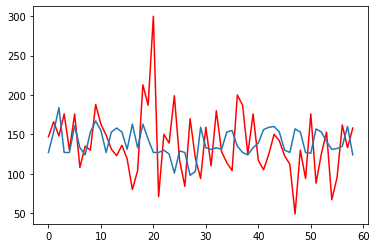

In [169]:
import matplotlib.pyplot as plt
plt.plot(ls,act,c="red")
plt.plot(ls,pred)

In [170]:
B.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.000000,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.000000,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.000000,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.825444,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.000000,Urban,Y


# if duration is less than equal to 20 years, is customer eligible for required amount for some longer duration? What is that duration?(Regression)

In [175]:
B["duration"]=B.Loan_Amount_Term/12

In [181]:
pred_data = B[(B.duration <=20) & (B.Loan_Status =="Y")]
final_pred_data = B.drop(labels=["Loan_ID","Loan_Status","duration","Loan_Amount_Term"],axis=1)

In [187]:
final_pred_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,1.000000,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,1.000000,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,1.000000,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,0.825444,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,1.000000,Urban


# Prepare training data

In [195]:
T = A[A.Loan_Status =="Y"]
T1 = T[final_pred_data.columns]
T1.index = range(0,T1.shape[0])

In [198]:
xtrain = PreProcessing(T1)

In [204]:
ytrain = T[["Loan_Amount_Term"]]
ytrain.index = range(0,ytrain.shape[0])

In [207]:
final_pred_val = PreProcessing(final_pred_data)

In [208]:
final_pred_val

,Credit_History,CoapplicantIncome,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Education_Graduate,Education_Not Graduate,Married_No,Married_Yes
0,0.47918,-0.673335,0,0,1,1,0,0,1
1,0.47918,-0.029848,0,0,1,1,0,0,1
2,0.47918,0.098849,0,0,1,1,0,0,1
3,0.00000,0.418877,0,0,1,1,0,0,1
4,0.47918,-0.673335,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...
362,0.47918,0.088982,0,0,1,0,1,0,1
363,0.47918,-0.369180,0,0,1,1,0,0,1
364,0.00000,0.181644,0,1,0,1,0,1,0
365,0.47918,0.353241,1,0,0,1,0,0,1


In [211]:
model = lr.fit(xtrain,ytrain)
preds = model.predict(final_pred_val)

In [217]:
U = B[(B.duration <=20) & (B.Loan_Status =="Y")][["Loan_Amount_Term"]]
U.index = range(0,U.shape[0])

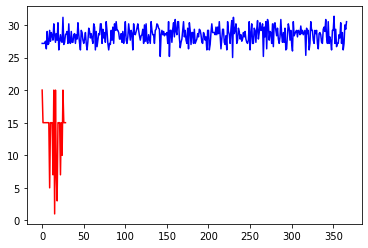

In [218]:
plt.plot(U/12,c="red")
plt.plot(preds/12,c="blue")